In [1]:
import pandas as pd

train_dataset = pd.read_csv('train2012-2017.csv')
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 17 columns):
scode    1077 non-null int64
12-ys    1077 non-null float64
12-lr    1077 non-null float64
12-ro    1077 non-null float64
13-ys    1077 non-null float64
13-lr    1077 non-null float64
13-ro    1077 non-null float64
14-ys    1077 non-null float64
14-lr    1077 non-null float64
14-ro    1077 non-null float64
15-ys    1077 non-null float64
15-lr    1077 non-null float64
15-ro    1077 non-null float64
16-ys    1077 non-null float64
16-lr    1077 non-null float64
16-ro    1077 non-null float64
17-ro    1077 non-null float64
dtypes: float64(16), int64(1)
memory usage: 143.1 KB


In [2]:
train_dataset.head()

,scode,12-ys,12-lr,12-ro,13-ys,13-lr,13-ro,14-ys,14-lr,14-ro,15-ys,15-lr,15-ro,16-ys,16-lr,16-ro,17-ro
0,300400,-8.205006,-13.820762,18.16,0.000000,0.000000,18.16,10.692793,-8.673529,12.66,-4.591866,-0.157719,8.64,27.601699,62.640479,12.84,17.43
1,2297,22.814957,-199.954056,-6.08,0.000000,0.000000,-6.08,3.585615,114.774347,0.46,-15.994442,-2711.805094,-12.77,61.254196,104.621173,0.45,-4.00
2,2069,-11.204652,-78.778239,4.09,0.482066,-8.267077,3.93,1.577869,-1326.834832,-67.69,2.425382,79.573644,-24.04,11.930615,132.763092,8.47,-99.63
3,300167,-1.932369,-30.428250,2.27,-3.641963,-73.568747,0.74,8.014552,-279.438153,-1.35,43.698091,207.003633,1.45,32.555234,193.463759,4.13,-0.81
4,2422,14.325010,12.564577,13.11,16.074063,-0.735085,11.55,17.451180,-7.190127,9.78,-3.241526,-35.595405,5.91,10.338378,-9.396434,5.21,6.45


In [3]:
def getClass(x):
    if x < 0:
        return 0
    if x >= 0 and x < 20:
        return 1
    if x >= 20:
        return 2

train_dataset[u'17-ro'] = train_dataset[u'17-ro'].apply(func = getClass)
train_dataset.head()

,scode,12-ys,12-lr,12-ro,13-ys,13-lr,13-ro,14-ys,14-lr,14-ro,15-ys,15-lr,15-ro,16-ys,16-lr,16-ro,17-ro
0,300400,-8.205006,-13.820762,18.16,0.000000,0.000000,18.16,10.692793,-8.673529,12.66,-4.591866,-0.157719,8.64,27.601699,62.640479,12.84,1
1,2297,22.814957,-199.954056,-6.08,0.000000,0.000000,-6.08,3.585615,114.774347,0.46,-15.994442,-2711.805094,-12.77,61.254196,104.621173,0.45,0
2,2069,-11.204652,-78.778239,4.09,0.482066,-8.267077,3.93,1.577869,-1326.834832,-67.69,2.425382,79.573644,-24.04,11.930615,132.763092,8.47,0
3,300167,-1.932369,-30.428250,2.27,-3.641963,-73.568747,0.74,8.014552,-279.438153,-1.35,43.698091,207.003633,1.45,32.555234,193.463759,4.13,0
4,2422,14.325010,12.564577,13.11,16.074063,-0.735085,11.55,17.451180,-7.190127,9.78,-3.241526,-35.595405,5.91,10.338378,-9.396434,5.21,1


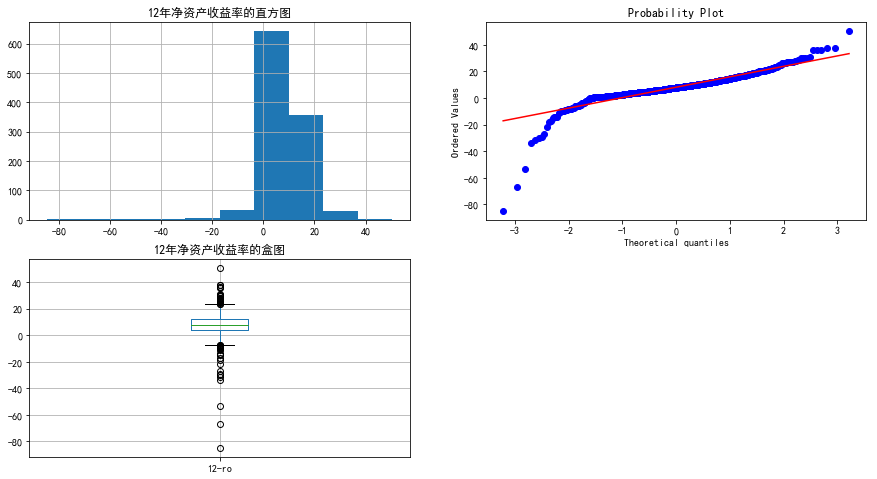

In [4]:
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('12年净资产收益率的直方图')
train_dataset['12-ro'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('12年净资产收益率的QQ图')
stats.probplot(train_dataset['12-ro'], dist="norm", plot=plt)

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('12年净资产收益率的盒图')
pd.DataFrame({'12-ro':train_dataset['12-ro']}).boxplot()

plt.show()

## 使用决策树

In [5]:
from sklearn import tree

feature = train_dataset.iloc[:,1:-1]
feature.head()

,12-ys,12-lr,12-ro,13-ys,13-lr,13-ro,14-ys,14-lr,14-ro,15-ys,15-lr,15-ro,16-ys,16-lr,16-ro
0,-8.205006,-13.820762,18.16,0.000000,0.000000,18.16,10.692793,-8.673529,12.66,-4.591866,-0.157719,8.64,27.601699,62.640479,12.84
1,22.814957,-199.954056,-6.08,0.000000,0.000000,-6.08,3.585615,114.774347,0.46,-15.994442,-2711.805094,-12.77,61.254196,104.621173,0.45
2,-11.204652,-78.778239,4.09,0.482066,-8.267077,3.93,1.577869,-1326.834832,-67.69,2.425382,79.573644,-24.04,11.930615,132.763092,8.47
3,-1.932369,-30.428250,2.27,-3.641963,-73.568747,0.74,8.014552,-279.438153,-1.35,43.698091,207.003633,1.45,32.555234,193.463759,4.13
4,14.325010,12.564577,13.11,16.074063,-0.735085,11.55,17.451180,-7.190127,9.78,-3.241526,-35.595405,5.91,10.338378,-9.396434,5.21


In [6]:
target = train_dataset.iloc[:,-1]
target = pd.DataFrame(target)
target.head()
#class_names = ['verylow','low', 'middle', 'high', 'veryhigh']
class_names = ['low', 'middle', 'high']

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(feature, target)

In [8]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("decision_tree")

'decision_tree.pdf'

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=feature.columns.values,  class_names=class_names,  
                filled=True, rounded=True,   special_characters=True)  
graph = graphviz.Source(dot_data)
#graph
graph.render("decision_tree2")

'decision_tree2.pdf'

In [10]:
test_dataset = pd.read_csv('test2013-2018.csv')
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 17 columns):
scode    1166 non-null int64
13-ys    1166 non-null float64
13-lr    1166 non-null float64
13-ro    1166 non-null float64
14-ys    1166 non-null float64
14-lr    1166 non-null float64
14-ro    1166 non-null float64
15-ys    1166 non-null float64
15-lr    1166 non-null float64
15-ro    1166 non-null float64
16-ys    1166 non-null float64
16-lr    1166 non-null float64
16-ro    1166 non-null float64
17-ys    1166 non-null float64
17-lr    1166 non-null float64
17-ro    1166 non-null float64
18-ro    1166 non-null float64
dtypes: float64(16), int64(1)
memory usage: 154.9 KB


In [11]:
test_dataset[u'18-ro'] = test_dataset[u'18-ro'].apply(func = getClass)
test_dataset.head()

,scode,13-ys,13-lr,13-ro,14-ys,14-lr,14-ro,15-ys,15-lr,15-ro,16-ys,16-lr,16-ro,17-ys,17-lr,17-ro,18-ro
0,2288,34.165422,6.384064,4.04,29.272430,-85.240942,0.56,-12.808341,282.068391,1.68,-1.191840,-334.611816,-3.57,38.957871,176.858477,3.15,1
1,415,16.584470,35.753108,7.96,7.456498,-13.237266,10.65,43.411099,42.846443,12.28,146.859379,74.538739,7.79,48.136782,15.527876,8.37,1
2,2358,32.927041,35.808203,20.09,-14.711336,-0.255897,15.51,50.188416,-29.536663,8.59,74.724057,81.018662,10.88,20.278760,35.142874,9.49,1
3,611,530.082514,124.714077,1.93,-94.177197,-540.738560,-9.16,-49.515140,-608.742070,-96.93,-12.045076,101.440450,2.67,36.709220,-519.737273,-6.04,0
4,2321,-2.931766,-3059.327074,-10.43,4.938232,109.876074,0.86,0.781112,38.982121,1.19,35.381382,423.205798,4.70,63.912672,-33.023324,2.51,1


In [12]:
test_feature = test_dataset.iloc[:,1:16]
test_feature.head()

,13-ys,13-lr,13-ro,14-ys,14-lr,14-ro,15-ys,15-lr,15-ro,16-ys,16-lr,16-ro,17-ys,17-lr,17-ro
0,34.165422,6.384064,4.04,29.272430,-85.240942,0.56,-12.808341,282.068391,1.68,-1.191840,-334.611816,-3.57,38.957871,176.858477,3.15
1,16.584470,35.753108,7.96,7.456498,-13.237266,10.65,43.411099,42.846443,12.28,146.859379,74.538739,7.79,48.136782,15.527876,8.37
2,32.927041,35.808203,20.09,-14.711336,-0.255897,15.51,50.188416,-29.536663,8.59,74.724057,81.018662,10.88,20.278760,35.142874,9.49
3,530.082514,124.714077,1.93,-94.177197,-540.738560,-9.16,-49.515140,-608.742070,-96.93,-12.045076,101.440450,2.67,36.709220,-519.737273,-6.04
4,-2.931766,-3059.327074,-10.43,4.938232,109.876074,0.86,0.781112,38.982121,1.19,35.381382,423.205798,4.70,63.912672,-33.023324,2.51


In [13]:
clf.predict(test_feature)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [14]:
clf.predict_proba(test_feature)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [15]:
test_target = test_dataset.iloc[:,-1]
test_target.head()

0    1
1    1
2    1
3    0
4    1
Name: 18-ro, dtype: int64

In [16]:
clf.score(test_feature,test_target)

0.7144082332761578